In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ecommerce_sales.csv")
pd.set_option('display.max.columns',8)
pd.set_option('display.max.rows',501)
pd.set_option('display.float_format',lambda x:'%.2f'%x)
df

,Order_Date,Customer_ID,Category,Product,Quantity,Unit_Price,Total_Sales
0,2024-12-17,a3225ef4,Clothing,T-Shirt,4,141.43,565.72
1,2024-09-19,3f416b5c,Electronics,Smartwatch,5,84.48,422.40
2,2024-07-14,5a593d97,Clothing,Jacket,4,499.18,1996.72
3,2024-08-24,0c93e720,Beauty,Skincare Set,2,27.06,54.12
4,2024-07-18,c85e2156,Clothing,T-Shirt,2,60.10,120.20
5,2024-12-03,ead4c940,Home & Kitchen,Blender,1,362.99,362.99
6,2025-02-08,603c34ac,Home & Kitchen,Blender,2,291.78,583.56
7,2024-09-30,92292d26,Beauty,Hair Dryer,2,307.66,615.32
8,2024-10-19,2b6b639b,Toys,Lego Set,1,445.37,445.37
9,2024-02-24,112fbfa8,Home & Kitchen,Coffee Maker,5,442.18,2210.90


In [2]:
print(df.head()) 
print(df.info()) 
print(df.describe())

   Order_Date Customer_ID     Category       Product  Quantity  Unit_Price  \
0  2024-12-17    a3225ef4     Clothing       T-Shirt         4      141.43   
1  2024-09-19    3f416b5c  Electronics    Smartwatch         5       84.48   
2  2024-07-14    5a593d97     Clothing        Jacket         4      499.18   
3  2024-08-24    0c93e720       Beauty  Skincare Set         2       27.06   
4  2024-07-18    c85e2156     Clothing       T-Shirt         2       60.10   

   Total_Sales  
0       565.72  
1       422.40  
2      1996.72  
3        54.12  
4       120.20  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Order_Date   500 non-null    object 
 1   Customer_ID  500 non-null    object 
 2   Category     500 non-null    object 
 3   Product      500 non-null    object 
 4   Quantity     500 non-null    int64  
 5   Unit_Price   500 non-null 

In [3]:
df.dropna(inplace=True)  # Remove missing values
df["Order_Date"] = pd.to_datetime(df["Order_Date"])  # Convert date column
df["Year-Month"] = df["Order_Date"].dt.to_period("M")  # Create monthly column
df["Total_Sales"] = df["Quantity"] * df["Unit_Price"]  # Calculate total sales

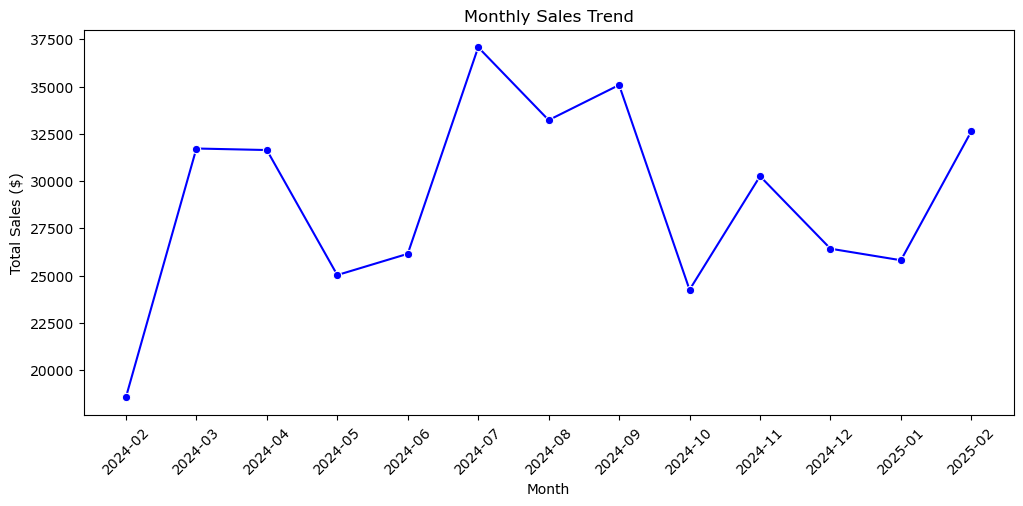

In [4]:
#MONTHLY SALES TREND
monthly_sales = df.groupby("Year-Month")["Total_Sales"].sum()
plt.figure(figsize=(12, 5))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker="o", color="b")
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.show()

/private/var/mobile/Containers/Data/Application/43423E21-0953-481C-B5D6-38BD58893D48/tmp/ipykernel_793/1124300528.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


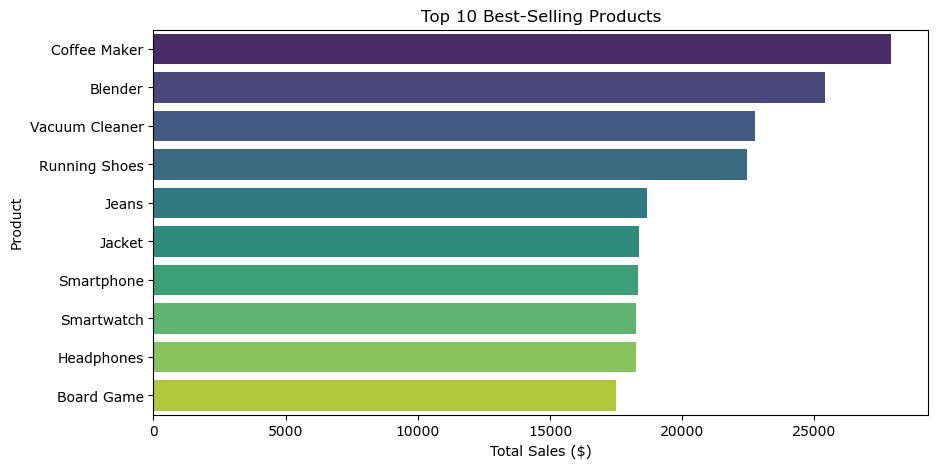

In [5]:
#BEST SELLING PRODUCTS
top_products = df.groupby("Product")["Total_Sales"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Sales ($)")
plt.show()

/private/var/mobile/Containers/Data/Application/43423E21-0953-481C-B5D6-38BD58893D48/tmp/ipykernel_793/1177721018.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette="coolwarm")


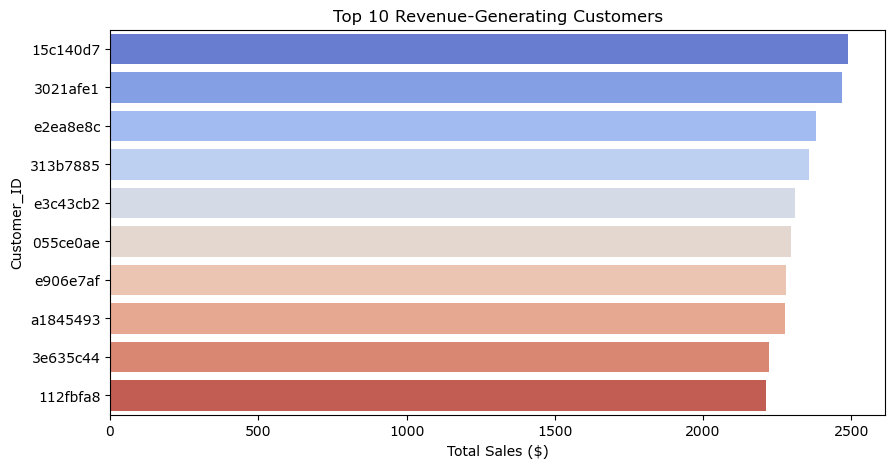

In [6]:
#CUSTOMER BY REVENUE
top_customers = df.groupby("Customer_ID")["Total_Sales"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_customers.values, y=top_customers.index, palette="coolwarm")
plt.title("Top 10 Revenue-Generating Customers")
plt.xlabel("Total Sales ($)")
plt.show()

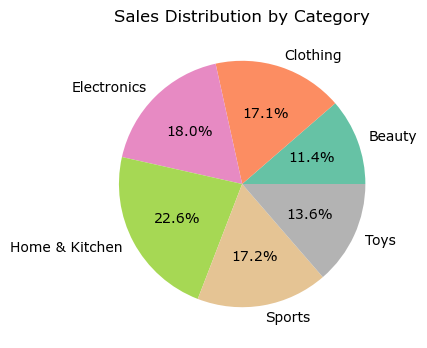

In [7]:
#SALES DUSTRIBUTION BTCATEGORY
category_sales = df.groupby("Category")["Total_Sales"].sum()
plt.figure(figsize=(8, 4))
category_sales.plot(kind="pie", autopct="%1.1f%%", colormap="Set2")
plt.title("Sales Distribution by Category")
plt.ylabel("")
plt.show()